In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
path_to_train = "images/train_happy.h5"
path_to_test = "images/test_happy.h5"

train_dataset = h5py.File(path_to_train)
x_train = np.array(train_dataset['train_set_x'])
y_train = np.array(train_dataset['train_set_y'], ndmin=2)

test_dataset = h5py.File(path_to_test)
x_test = np.array(test_dataset['test_set_x'])
y_test = np.array(test_dataset['test_set_y'], ndmin=2)

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (1, 600)
X_test shape: (150, 64, 64, 3)
Y_test shape: (1, 150)


In [3]:
x_train = (x_train)/255
x_test = (x_test)/255
y_train = y_train.T
y_test = y_test.T

The person is :not happy


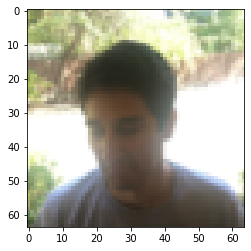

In [4]:
i=np.random.randint(x_train.shape[0])
x= "happy" if  y_train[i] else "not happy"
print("The person is :"+x)
plt.imshow(x_train[i])

In [5]:
import tensorflow as tf

In [6]:
model = tf.keras.Sequential()

 
model.add(tf.keras.layers.Conv2D(16,(3,3), padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.1))

 
model.add(tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))


model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))



model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(500, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation = 'relu'))


model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

In [8]:
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model_history= model.fit(x_train, y_train, epochs=30, batch_size=2, validation_split=0.2)

Epoch 1/30
240/240 [==============================] - 10s 37ms/step - loss: 1.3861 - accuracy: 0.6521 - val_loss: 0.9416 - val_accuracy: 0.5500
Epoch 2/30
240/240 [==============================] - 9s 38ms/step - loss: 0.5634 - accuracy: 0.7708 - val_loss: 0.4208 - val_accuracy: 0.8500
Epoch 3/30
240/240 [==============================] - 9s 36ms/step - loss: 0.3531 - accuracy: 0.8687 - val_loss: 0.2096 - val_accuracy: 0.8917
Epoch 4/30
240/240 [==============================] - 9s 38ms/step - loss: 0.2737 - accuracy: 0.9146 - val_loss: 0.6114 - val_accuracy: 0.7333
Epoch 5/30
240/240 [==============================] - 9s 37ms/step - loss: 0.2441 - accuracy: 0.9083 - val_loss: 0.1605 - val_accuracy: 0.9667
Epoch 6/30
240/240 [==============================] - 9s 39ms/step - loss: 0.1910 - accuracy: 0.9354 - val_loss: 0.1826 - val_accuracy: 0.8917
Epoch 7/30
240/240 [==============================] - 9s 39ms/step - loss: 0.1762 - accuracy: 0.9312 - val_loss: 0.2986 - val_accuracy: 0.841

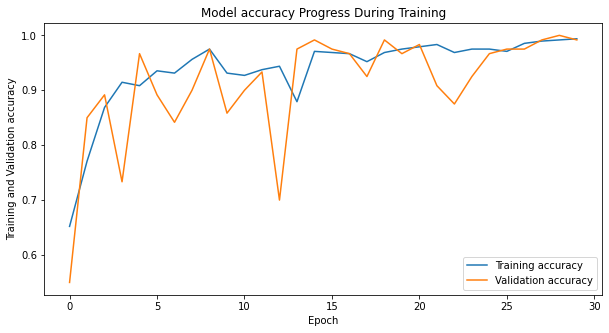

In [10]:
plt.figure(figsize=(10,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

In [12]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 43ms/step - loss: 0.1811 - accuracy: 0.9533
Test accuracy: 0.95333331823349
